In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
import matplotlib.pyplot as plt

In [2]:
# load dataset 2

In [3]:
df = pd.read_csv('2_distribution_applicant_sex_and_action_taken.csv', low_memory=False)

# 3 ethnicity and race distribution

## All the race and ethnicity columns we want

applicant_ethnicity_1                     
                 
co_applicant_ethnicity_1 

applicant_race_1                          
applicant_race_2                         

co_applicant_race_1                      
co_applicant_race_2                      

## Columns we use for the model

In [4]:
columns_of_interest = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1', 'applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

In [5]:
info_df = df[columns_of_interest]
print(info_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162206 entries, 0 to 162205
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_ethnicity_1     161278 non-null  float64
 1   co_applicant_ethnicity_1  161883 non-null  float64
 2   applicant_race_1          161903 non-null  float64
 3   applicant_race_2          9251 non-null    float64
 4   co_applicant_race_1       162113 non-null  float64
 5   co_applicant_race_2       4252 non-null    float64
dtypes: float64(6)
memory usage: 7.4 MB
None


# Race

In [6]:
print(df['applicant_race_1'].value_counts())

applicant_race_1
5.0     113478
6.0      19087
3.0      12757
2.0      10246
21.0      1809
1.0       1711
22.0       667
23.0       500
27.0       421
26.0       301
4.0        268
25.0       225
44.0       182
7.0        140
24.0        66
42.0        19
41.0        14
43.0        12
Name: count, dtype: int64


Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

### We only want 5 - White and 3 - Black or African American

In [7]:
# Columns of interest
columns_of_race = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

### remove not needed columns

In [8]:
# Filter the DataFrame to keep rows with categories 2 and 3 for the specified columns
filtered_race = df[columns_of_race].isin([5.0, 3.0])

# Filter the race columns
filtered_df_race = df[columns_of_race][filtered_race]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([df.drop(columns_of_race, axis=1), filtered_df_race], axis=1)

# Print the value counts for each column
for column in columns_of_race:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_race_1
applicant_race_1
5.0    113478
3.0     12757
Name: count, dtype: int64
applicant_race_2
applicant_race_2
5.0    1353
3.0     191
Name: count, dtype: int64
co_applicant_race_1
co_applicant_race_1
5.0    53147
3.0     3256
Name: count, dtype: int64
co_applicant_race_2
co_applicant_race_2
5.0    436
3.0     38
Name: count, dtype: int64


# Ethnicity

In [9]:
print(filtered_df['applicant_ethnicity_1'].value_counts())

applicant_ethnicity_1
2.0     122761
1.0      18591
3.0      16696
11.0      1300
14.0      1258
12.0       329
13.0       208
4.0        135
Name: count, dtype: int64


Values:
- 1 - Hispanic or Latino
- 11 - Mexican
- 12 - Puerto Rican
- 13 - Cuban
- 14 - Other Hispanic or Latino
- 2 - Not Hispanic or Latino
- 3 - Information not provided by applicant in mail, internet, or telephone application
- 4 - Not applicable

### We only want 2 - Not Hispanic or Latino & 1 - Hispanic or Latino 

In [10]:
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

### remove not needed columns

In [11]:
# Filter the DataFrame to keep rows with categories 1 and 2 for the specified columns
filtered_ethnicity = filtered_df[columns_of_ethnicity].isin([1.0, 2.0])

# Filter the race columns
filtered_df_ethnicity = filtered_df[columns_of_ethnicity][filtered_ethnicity]

# Merge the filtered race columns with the rest of the DataFrame
filtered_df = pd.concat([filtered_df.drop(columns_of_ethnicity, axis=1), filtered_df_ethnicity], axis=1)

# Print the value counts for each column
for column in columns_of_ethnicity:
    print(f"{column}\n{filtered_df[column].value_counts()}")


applicant_ethnicity_1
applicant_ethnicity_1
2.0    122761
1.0     18591
Name: count, dtype: int64
co_applicant_ethnicity_1
co_applicant_ethnicity_1
2.0    56183
1.0     7730
Name: count, dtype: int64


# Visualisations

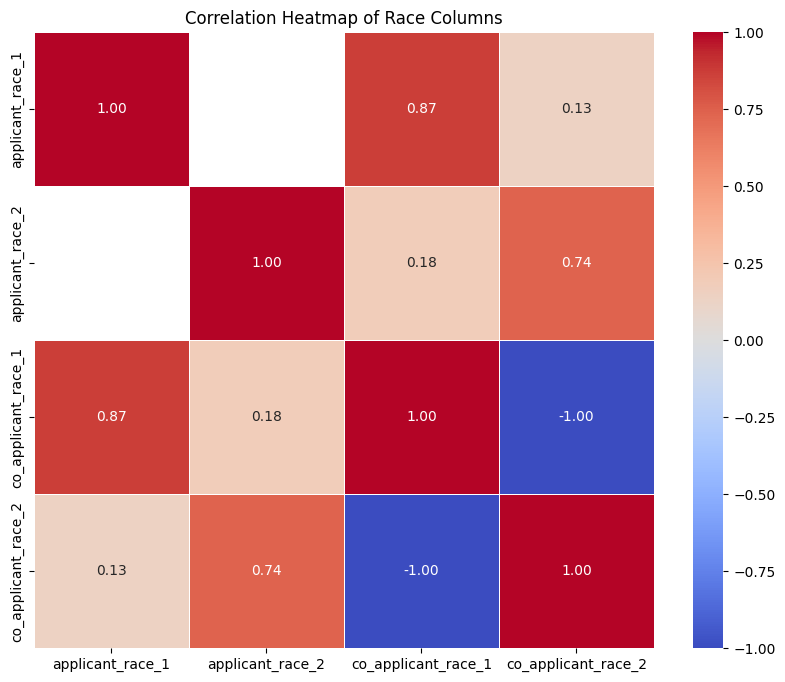

In [12]:
# Select the specified race columns
selected_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
selected_df = filtered_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Race Columns')
plt.show()

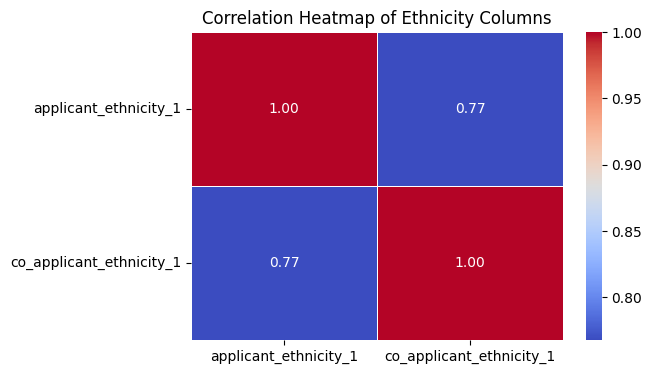

In [13]:
# Select the specified ethnicity columns
columns_of_ethnicity = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']
ethnicity_df =  filtered_df[columns_of_ethnicity]

# Calculate the correlation matrix
correlation_matrix_ethnicity = ethnicity_df.corr()

# Plot the heatmap for ethnicity columns
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_ethnicity, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Ethnicity Columns')
plt.show()

In [14]:
# Define the race and ethnicity categories
race_categories = ['5.0', '3.0']
ethnicity_categories = ['2.0', '1.0']

# Define the columns for race and ethnicity
race_columns = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Initialize counts for each combination
race_counts = [[0] * len(race_categories) for _ in range(len(race_columns))]
ethnicity_counts = [[0] * len(ethnicity_categories) for _ in range(len(ethnicity_columns))]

# Iterate through the DataFrame and count combinations
for idx, row in filtered_df.iterrows():
    for i, col in enumerate(race_columns):
        race_val = str(row[col])
        if race_val in race_categories:
            race_counts[i][race_categories.index(race_val)] += 1

    for i, col in enumerate(ethnicity_columns):
        ethnicity_val = str(row[col])
        if ethnicity_val in ethnicity_categories:
            ethnicity_counts[i][ethnicity_categories.index(ethnicity_val)] += 1

# Now, race_counts and ethnicity_counts have the counts for each combination
print('Race Counts:', race_counts)
print('Ethnicity Counts:', ethnicity_counts)


Race Counts: [[113478, 12757], [1353, 191], [53147, 3256], [436, 38]]
Ethnicity Counts: [[122761, 18591], [56183, 7730]]


In [15]:
def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['1.0', '2.0'], index=categories)
    df.index.name = 'ethnicity_categories'
    return df

ethnicity_categories = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Generate and display the Ethnicity Counts table
print('Ethnicity Counts:')
ethnicity_table = generate_counts_table(ethnicity_counts, ethnicity_categories)
print(ethnicity_table)

Ethnicity Counts:
                             1.0    2.0
ethnicity_categories                   
applicant_ethnicity_1     122761  18591
co_applicant_ethnicity_1   56183   7730


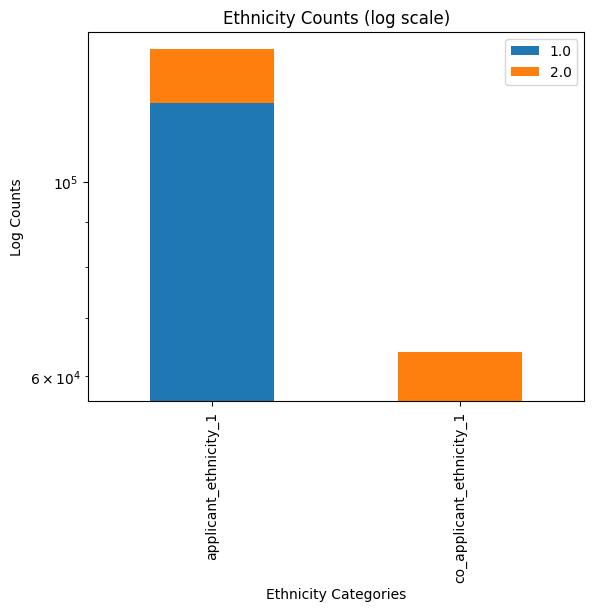

In [16]:
# Plot the Ethnicity Counts on a logarithmic scale
ethnicity_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Ethnicity Categories')
plt.ylabel('Log Counts')
plt.title('Ethnicity Counts (log scale)')
plt.show()

In [17]:
import pandas as pd

def generate_counts_table(counts, categories):
    df = pd.DataFrame(counts, columns=['5.0', '3.0'], index=categories)
    df.index.name = 'race_categories'
    return df

race_categories = ['applicant_race_1', 'applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']

# Generate and display the Race Counts table
print('Race Counts:')
race_table = generate_counts_table(race_counts, race_categories)
print(race_table)


Race Counts:
                        5.0    3.0
race_categories                   
applicant_race_1     113478  12757
applicant_race_2       1353    191
co_applicant_race_1   53147   3256
co_applicant_race_2     436     38


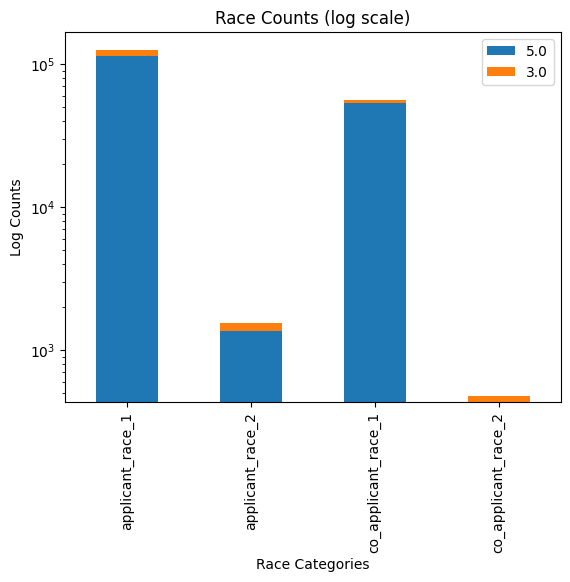

In [18]:
# Plot the Race Counts on a logarithmic scale
race_table.plot(kind='bar', stacked=True, logy=True)
plt.xlabel('Race Categories')
plt.ylabel('Log Counts')
plt.title('Race Counts (log scale)')
plt.show()

## See all the WHITE applicants.

In [19]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_5 = filtered_df[(filtered_df['applicant_race_1'] == 5.0)]

race_columns1 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns1 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns = race_columns1 + ethnicity_columns1
filtered_df_selected_columns = filtered_df_applicant_race_1_5[selected_columns]

In [20]:
filtered_df_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113478 entries, 1 to 162205
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   applicant_race_2          0 non-null       float64
 1   co_applicant_race_1       51459 non-null   float64
 2   co_applicant_race_2       258 non-null     float64
 3   applicant_ethnicity_1     109099 non-null  float64
 4   co_applicant_ethnicity_1  51581 non-null   float64
dtypes: float64(5)
memory usage: 5.2 MB


In [21]:
# Sort with NaN values at the bottom
df_sorted = pd.concat([filtered_df_selected_columns.dropna(), 
                       filtered_df_selected_columns[filtered_df_selected_columns.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics = df_sorted.describe()

In [22]:
print(statistics)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count               0.0         51459.000000           258.000000   
mean                NaN             4.984959             4.860465   
std                 NaN             0.172790             0.510500   
min                 NaN             3.000000             3.000000   
25%                 NaN             5.000000             5.000000   
50%                 NaN             5.000000             5.000000   
75%                 NaN             5.000000             5.000000   
max                 NaN             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count          109099.000000              51581.000000  
mean                1.868147                  1.876931  
std                 0.338332                  0.328519  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- White applicants generally have only one race.
- Most co applicants for white people are black.
- Some co applicants have a 2nd race.

- White applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

## See all the BLACK applicants.

In [23]:
# Filter the DataFrame to include only 'applicant_race_1' with value 5.0
filtered_df_applicant_race_1_3 = filtered_df[(filtered_df['applicant_race_1'] == 3.0)]

race_columns2 = ['applicant_race_2', 'co_applicant_race_1', 'co_applicant_race_2']
ethnicity_columns2 = ['applicant_ethnicity_1', 'co_applicant_ethnicity_1']

# Select specific columns
selected_columns2 = race_columns2 + ethnicity_columns2
filtered_df_selected_columns2 = filtered_df_applicant_race_1_3[selected_columns2]

In [24]:
filtered_df_selected_columns2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12757 entries, 0 to 162195
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   applicant_race_2          294 non-null    float64
 1   co_applicant_race_1       3146 non-null   float64
 2   co_applicant_race_2       46 non-null     float64
 3   applicant_ethnicity_1     11750 non-null  float64
 4   co_applicant_ethnicity_1  3050 non-null   float64
dtypes: float64(5)
memory usage: 598.0 KB


In [25]:
# Sort with NaN values at the bottom
df_sorted2 = pd.concat([filtered_df_selected_columns2.dropna(), 
                       filtered_df_selected_columns2[filtered_df_selected_columns2.isna().any(axis=1)]], 
                      ignore_index=True)

# Calculate summary statistics
statistics2 = df_sorted2.describe()

In [26]:
print(statistics2)

       applicant_race_2  co_applicant_race_1  co_applicant_race_2  \
count             294.0          3146.000000            46.000000   
mean                5.0             3.247298             4.652174   
std                 0.0             0.658466             0.766446   
min                 5.0             3.000000             3.000000   
25%                 5.0             3.000000             5.000000   
50%                 5.0             3.000000             5.000000   
75%                 5.0             3.000000             5.000000   
max                 5.0             5.000000             5.000000   

       applicant_ethnicity_1  co_applicant_ethnicity_1  
count           11750.000000               3050.000000  
mean                1.973021                  1.956066  
std                 0.162028                  0.204983  
min                 1.000000                  1.000000  
25%                 2.000000                  2.000000  
50%                 2.000000        

# Conclusion
- Black applicants mostly are one race, but some are mixed.
- co applicants for black people are fairly evenly spread black and white.
- Some co applicants have a 2nd race.

- Black applicants do NOT have Hispanic or Latino ethnicity
- Same for the co applicant.

In [27]:
filtered_df['applicant_race_1'] = filtered_df['applicant_race_1'].astype('Int32')
filtered_df['co_applicant_race_1'] = filtered_df['co_applicant_race_1'].astype('Int32')
filtered_df['applicant_ethnicity_1'] = filtered_df['applicant_ethnicity_1'].astype('Int32')
filtered_df['co_applicant_ethnicity_1'] = filtered_df['co_applicant_ethnicity_1'].astype('Int32')

In [28]:
filtered_df.head()

,census_tract,action_taken,loan_type,lien_status,reverse_mortgage,open_end_line_of_credit,loan_amount,combined_loan_to_value_ratio,interest_rate,total_loan_costs,...,co_applicant_sex,applicant_age,co_applicant_age,aus_1,applicant_race_1,applicant_race_2,co_applicant_race_1,co_applicant_race_2,applicant_ethnicity_1,co_applicant_ethnicity_1
0,9.003416e+09,3,2,1,2,2,115000,98.188,NaN,NaN,...,5,35-44,9999,1,3,NaN,<NA>,NaN,2,<NA>
1,4.201710e+10,3,3,1,2,2,205000,110.256,NaN,NaN,...,2,>74,65-74,1,5,NaN,5,NaN,2,2
2,3.401700e+10,3,1,1,2,2,205000,59.629,NaN,NaN,...,5,35-44,9999,1,3,NaN,<NA>,NaN,2,<NA>
3,6.065043e+09,3,1,1,2,2,155000,64.99,NaN,NaN,...,5,65-74,9999,1,5,NaN,<NA>,NaN,2,<NA>
4,3.711901e+10,3,1,1,2,2,255000,70.0,NaN,NaN,...,5,55-64,9999,1,3,NaN,<NA>,NaN,2,<NA>


In [29]:
filtered_df.to_csv('3_distribution_race_ethnicity.csv', index=False)